# 1 Membaca Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("netflix_titles.csv")

# Tampilkan dua tabel terpisah
from IPython.display import display

print(" 5 Baris Pertama:")
display(df.head())

print(" 5 Baris Terakhir:")
display(df.tail())

 5 Baris Pertama:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


 5 Baris Terakhir:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# 2. Mengecek Data yang Hilang (Missing Value)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Statistik untuk kolom numerik (meskipun sebagian besar kolom kemungkinan kategorikal)
print("\nStatistik Deskriptif:")
print(df.describe())



Statistik Deskriptif:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [ ]:
# Banyaknya nilai unik di tiap kolom
print("\nJumlah Nilai Unik Tiap Kolom:")
print(df.nunique())


Jumlah Nilai Unik Tiap Kolom:
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


In [ ]:
# Mode untuk tiap kolom kategorik
print("\nNilai Paling Sering Muncul per Kolom:")
for col in df.select_dtypes(include='object').columns:
    mode_val = df[col].mode()[0]
    print(f"{col}: {mode_val}")



Nilai Paling Sering Muncul per Kolom:
show_id: s1
type: Movie
title: #Alive
director: Rajiv Chilaka
cast: David Attenborough
country: United States
date_added: January 1, 2020
rating: TV-MA
duration: 1 Season
listed_in: Dramas, International Movies
description: Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.


In [ ]:
 # Cek jumlah dan persentase missing value
missing_data = df.isnull().sum().to_frame(name='Missing Count')
missing_data['Total Rows'] = df.shape[0]
missing_data['Percentage'] = (missing_data['Missing Count'] / df.shape[0]) * 100
missing_data = missing_data.sort_values(by='Percentage', ascending=False)

# Tampilkan tabel missing value
print("Analisis Missing Value:")
print(missing_data)

Analisis Missing Value:
              Missing Count  Total Rows  Percentage
director               2634        8807   29.908028
country                 831        8807    9.435676
cast                    825        8807    9.367549
date_added               10        8807    0.113546
rating                    4        8807    0.045418
duration                  3        8807    0.034064
show_id                   0        8807    0.000000
type                      0        8807    0.000000
title                     0        8807    0.000000
release_year              0        8807    0.000000
listed_in                 0        8807    0.000000
description               0        8807    0.000000


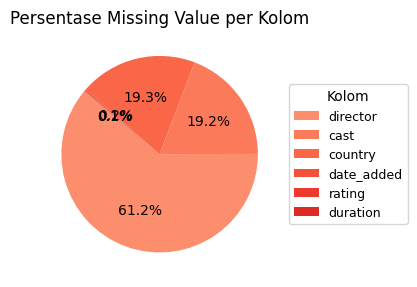

In [ ]:

# Pie chart dengan legend di luar
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(
    missing_percentage,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10}
)

# Tambahkan legend di luar chart
ax.legend(
    wedges,
    missing_percentage.index,
    title="Kolom",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=9,
    title_fontsize=10
)

ax.set_title("Persentase Missing Value per Kolom", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Mengisi missing values dengan pendekatan yang masuk akal

# 1. 'director' → Tidak selalu tersedia, jadi kita isi dengan "Unknown"
df['director'].fillna('Unknown', inplace=True)

# 2. 'cast' → Beberapa tayangan mungkin tidak punya pemeran terkenal, jadi isi dengan "Not Available"
df['cast'].fillna('Not Available', inplace=True)

# 3. 'country' → Bisa diisi dengan "Unknown", karena tidak diketahui pasti
df['country'].fillna('Unknown', inplace=True)

# 4. 'date_added' → Diisi menggunakan metode forward fill (isi dengan nilai sebelumnya)
df['date_added'].fillna(method='ffill', inplace=True)

# 5. 'rating' → Bisa diisi dengan modus (nilai yang paling sering muncul)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# 6. 'duration' → Diisi dengan "Unknown" karena bisa jadi data ini rusak atau tidak tersedia
df['duration'].fillna('Unknown', inplace=True)

<ipython-input-25-9c7d02f49389>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-25-9c7d02f49389>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Cek ulang apakah masih ada missing values
print("Jumlah missing values setelah penanganan:")
print(df.isnull().sum())

Jumlah missing values setelah penanganan:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# 3 handling duplicate

In [ ]:
# Cek duplikat umum (seluruh baris)
dupe_all = df.duplicated()
print(f"Duplikat seluruh baris (exact duplicates): {dupe_all.sum()}")

Duplikat seluruh baris (exact duplicates): 0


In [ ]:
# Cek duplikat berdasarkan kombinasi kolom penting
dupe_subset = df.duplicated(subset=['title', 'type', 'director', 'cast', 'release_year'])
print(f"Duplikat berdasarkan title, type, director, cast, release_year: {dupe_subset.sum()}")

Duplikat berdasarkan title, type, director, cast, release_year: 0


# 4 Visualization

<ipython-input-29-89d635e8ce56>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, ax=axs[0, 0], palette="pastel")
<ipython-input-29-89d635e8ce56>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, ax=axs[0, 1], palette="Set2")
<ipython-input-29-89d635e8ce56>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, ax=axs[1, 1], palette="coolwarm")
<ipython-input-29-89d635e8ce56>:54: UserWarning: Glyph 128250 (\N{TELEVISI

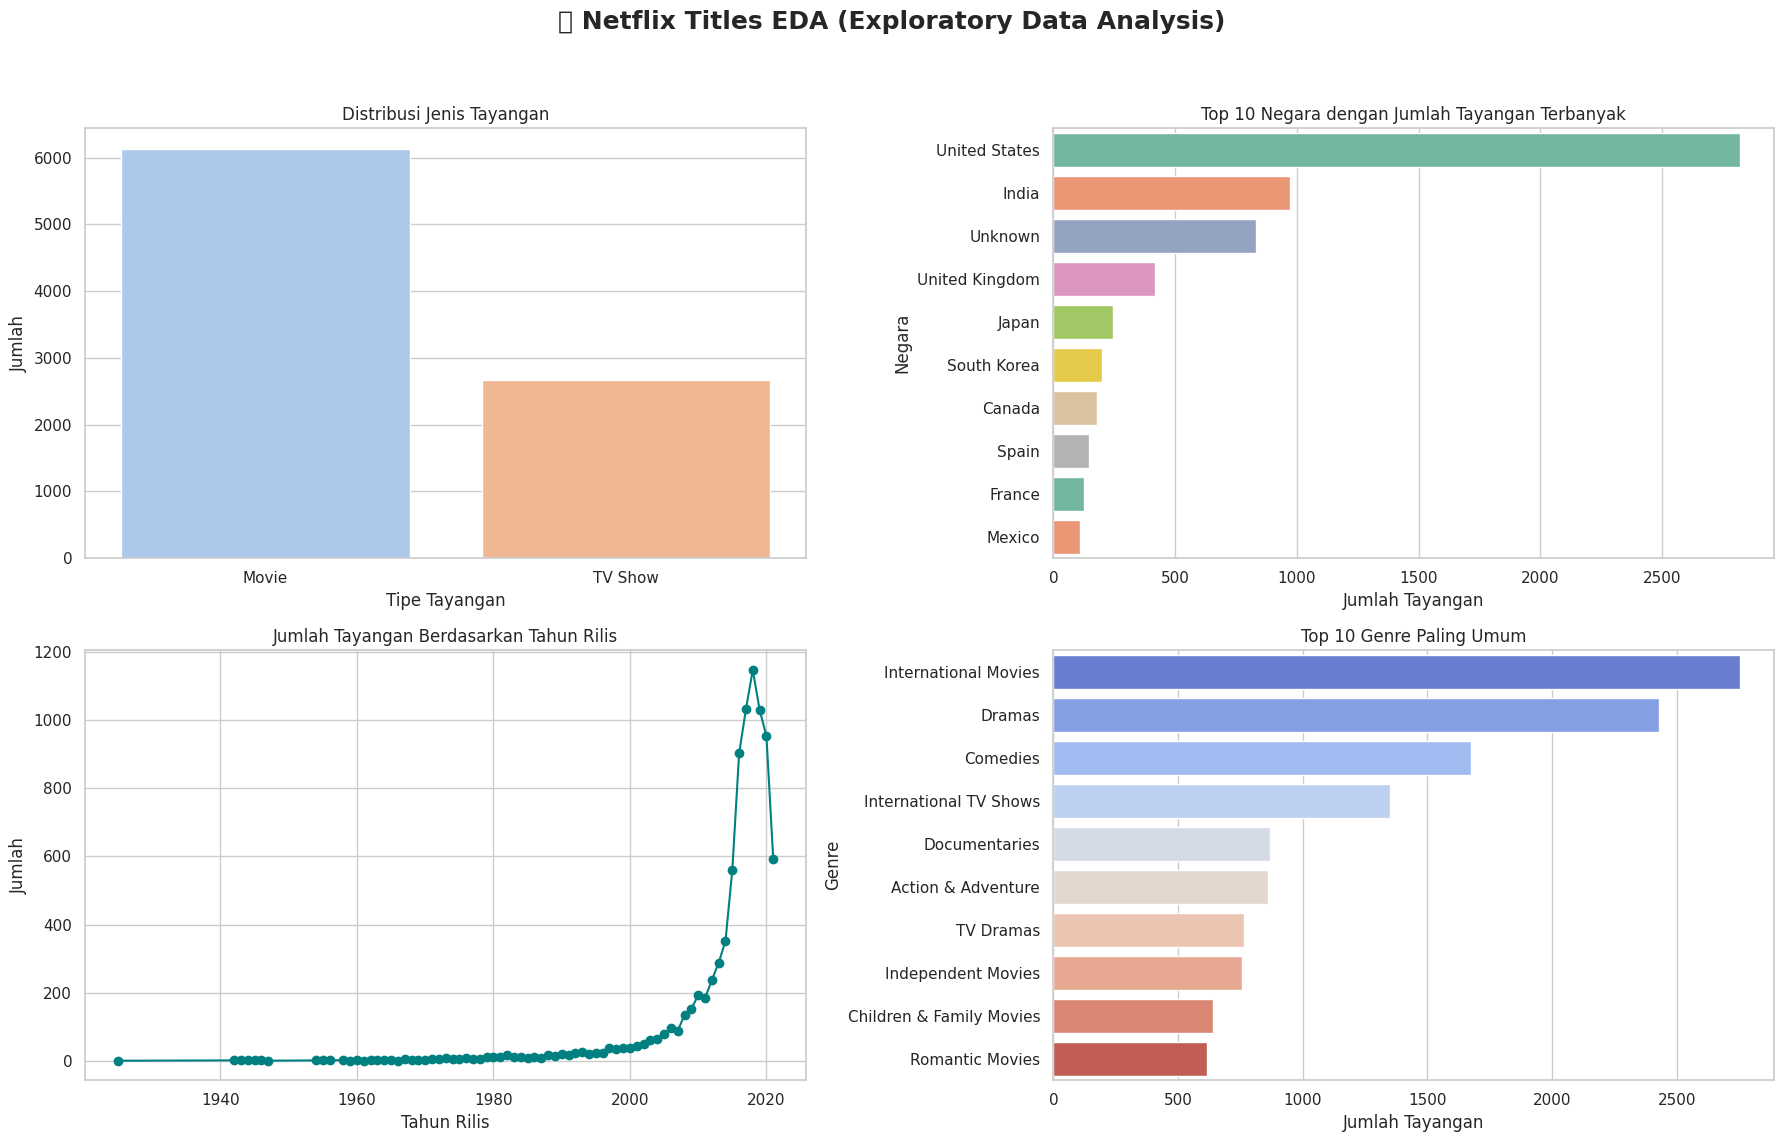

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Pastikan dataset sudah dimuat sebelumnya sebagai df
# Jika belum, jalankan: df = pd.read_csv('netflix_titles.csv')

# Setup style
sns.set(style="whitegrid")

# Distribusi tipe tayangan
type_counts = df['type'].value_counts()

# Jumlah tayangan berdasarkan tahun rilis
release_year_counts = df['release_year'].value_counts().sort_index()

# 10 Negara dengan jumlah tayangan terbanyak
top_countries = df['country'].value_counts().head(10)

# Genre paling umum
genre_series = df['listed_in'].dropna().str.split(', ')
genre_counts = Counter([genre for sublist in genre_series for genre in sublist])
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)

# Visualisasi
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("📺 Netflix Titles EDA (Exploratory Data Analysis)", fontsize=18, fontweight='bold')

# Plot 1: Distribusi jenis tayangan
sns.barplot(x=type_counts.index, y=type_counts.values, ax=axs[0, 0], palette="pastel")
axs[0, 0].set_title("Distribusi Jenis Tayangan")
axs[0, 0].set_ylabel("Jumlah")
axs[0, 0].set_xlabel("Tipe Tayangan")

# Plot 2: Negara terbanyak
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axs[0, 1], palette="Set2")
axs[0, 1].set_title("Top 10 Negara dengan Jumlah Tayangan Terbanyak")
axs[0, 1].set_xlabel("Jumlah Tayangan")
axs[0, 1].set_ylabel("Negara")

# Plot 3: Jumlah tayangan per tahun
axs[1, 0].plot(release_year_counts.index, release_year_counts.values, marker='o', color='teal')
axs[1, 0].set_title("Jumlah Tayangan Berdasarkan Tahun Rilis")
axs[1, 0].set_xlabel("Tahun Rilis")
axs[1, 0].set_ylabel("Jumlah")

# Plot 4: Genre paling populer
sns.barplot(x=top_genres.values, y=top_genres.index, ax=axs[1, 1], palette="coolwarm")
axs[1, 1].set_title("Top 10 Genre Paling Umum")
axs[1, 1].set_xlabel("Jumlah Tayangan")
axs[1, 1].set_ylabel("Genre")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Insight dari Visualisasi:

-Movie mendominasi Netflix dibanding TV Show.

-United States, India, dan United Kingdom jadi negara penyumbang konten terbanyak.

-Tayangan Netflix melonjak signifikan sejak tahun 2015-2020.

-Genre populer: Dramas, International Movies, dan Comedies.